In [1]:
import oritelib as orite
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Import fasta seq
seq = orite.seq_from_fasta('test_data/exciting_bacteria/Porphyromonas_gingivalis_L3_FASTA.fasta')


In [3]:
# Max rotate 

max_things = orite.max_rotate_seq_and_skew_calc(seq)

max_cg = max_things[0]
max_cgc = max_things[1]
max_fasta = max_things[2]
max_offset = max_things[3]


inital max gc skew indx 1093354
max cgc skew indx 2343475


In [4]:
# Z - curve
xn, yn, zn = orite.calc_z_curve(max_fasta)

RY = xn
KM = yn

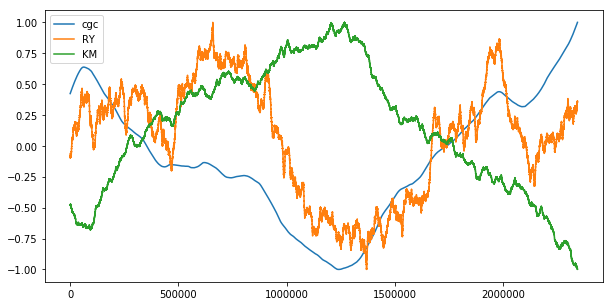

In [5]:
# Normalize skews 
cgc_scaled = orite.scale_skew(max_cgc)
RY_scaled = orite.scale_skew(RY)
KM_scaled = orite.scale_skew(KM)

plt.figure(figsize=[10,5])
plt.plot(cgc_scaled, label='cgc')
plt.plot(RY_scaled, label='RY')
plt.plot(KM_scaled, label='KM')
plt.legend()


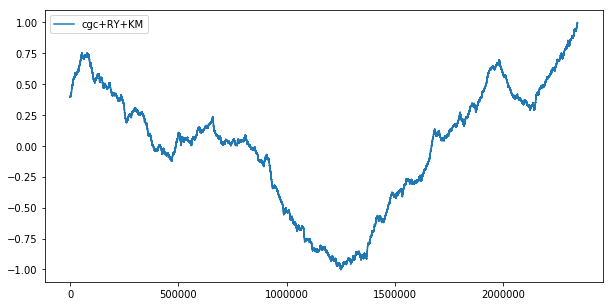

In [6]:
# sum all three (neg of RY)
cgc_ry_km = orite.scale_skew(cgc_scaled + RY_scaled - KM_scaled)
plt.figure(figsize=[10,5])
plt.plot(cgc_ry_km, label = 'cgc+RY+KM')
plt.legend()

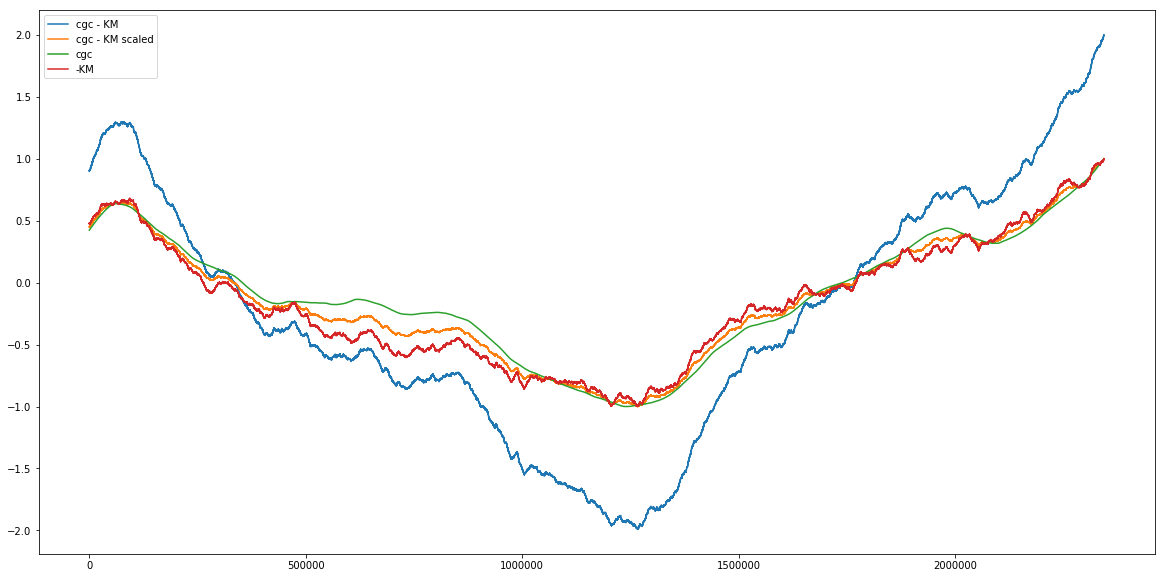

In [7]:
# sum cgc w. -1*KM 
cgc_km = cgc_scaled - KM_scaled
cgc_km_scaled = orite.scale_skew(cgc_scaled - KM_scaled)

plt.figure(figsize=[20,10])


plt.plot(cgc_km, label='cgc - KM')
plt.plot(cgc_km_scaled, label='cgc - KM scaled')
plt.plot(cgc_scaled, label='cgc')
plt.plot((-1)*KM_scaled, label='-KM')
plt.legend()

In [8]:
# Lets try moving on with a score curve of: (CGC_SCALED - KM_SCALED)_SCALED
score_curve = orite.scale_skew(cgc_scaled - KM_scaled)

In [9]:
# EXTRACT GENBANK INFORMATION and get all non coding regions with scores taken from the score-curve


g = orite.genbank_to_non_coding_intervals('test_data/exciting_bacteria/Porphyromonas_gingivalis_L3_GB.gb')

true_nc_intervals = g[0] # - List of touples
true_nc_positions = g[1] # - all NC positions in an arrays
non_coding_plus = g[2] # - nc regions interval touple list - WILL NOT BE USED
non_coding_neg  = g[3] # - nc regions interval touple list - WILL NOT BE USED


all_nc_regions = orite.get_phased_nc_region_list(true_nc_intervals, seq, max_offset, score_curve)
print('total number of intial non coding regions: ', len(all_nc_regions))

total number of intial non coding regions:  1720


In [12]:
# Compute kmers freqs for all regions and for many kmer lengths 
kmer_lengths_of_interrest = [6,7,8,9]

all_nc_regions = orite.calc_kmers_from_region_list(all_nc_regions, kmer_lengths_of_interrest)


In [13]:
# Filter out all nc regions belowe 50 in base length 
long_enough_regions = orite.filter_regions_by_length(all_nc_regions, 50)

print('number of nc regions above 50 in length: ', len(long_enough_regions))

number of nc regions above 50 in length:  1090


In [14]:
# Pre filter out regions with kmer occurances 
regions_3_and_more_occ = orite.filter_region_list_by_kmer_occurence(long_enough_regions, 3)
print('number of nc regions with kmers  having 3 or more occurances: ', len(regions_3_and_more_occ))



number of nc regions with kmers  having 3 or more occurances:  427


In [15]:
regions_3_and_more_occ = orite.calc_density_for_region_list(region_list=regions_3_and_more_occ)

In [16]:
#orite.plot_region_list(region_list=regions_3_and_more_occ, curve=score_curve)

In [17]:
#regions_3_and_more_occ[4].kmer_info

In [18]:
regions_overlapp_removed = orite.remove_overlapping_kmers_from_region_list(regions_3_and_more_occ)
print('number of nc regions with kmers without overlapping kmers: ', len(regions_3_and_more_occ))

number of nc regions with kmers without overlapping kmers:  427
